In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from  tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
df = pd.read_csv("TF_2_Notebooks_and_Data/DATA/fake_reg.csv")

In [6]:
df.head()
#Regresioni problem, imamo 2 atributa feature1 i feature2 i pogadjamo cenu na osnovu njih


,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


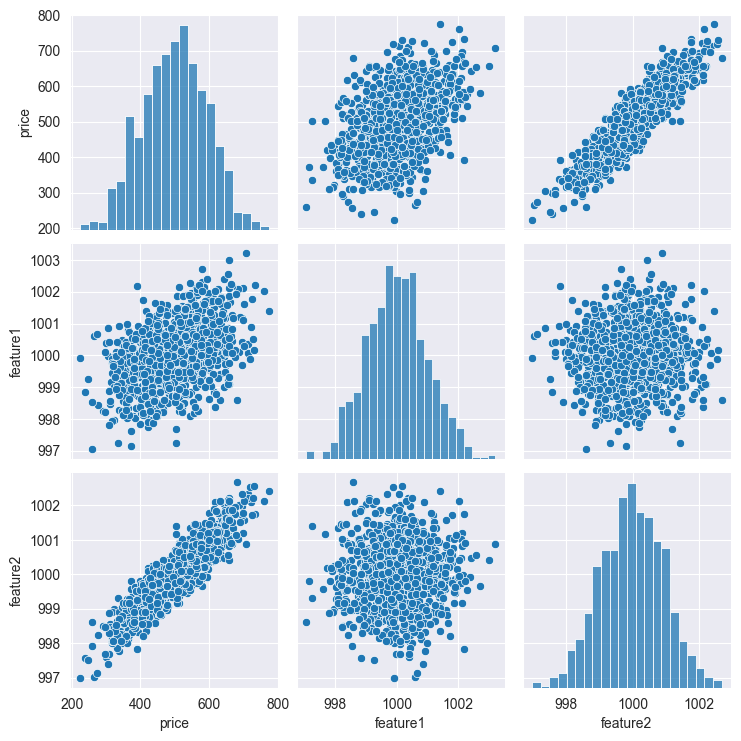

In [7]:
sns.pairplot(df) #Zavisnost svih atributa 
#Sto je veci feature2 veca je i cena
#Feature1 je uglavnom pozicioniran oko sredine

In [10]:
X = df[["feature1", "feature2"]].values #Vadimo X i vracamo pomocu .values kao numpy array 
y = df["price"].values #Vadimo y i vracamo pomocu .values kao numpy array

In [11]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
#Train_test_split vraca 4 promenljive X_test, X_train, y_test, y_train, 
#prima parametre X tj. atributte, y tj. labels, i velicinu testnog skupa + random_state prima seed (uvek hocemo isti split)

In [23]:
print(X_train.shape,X_test.shape)

(700, 2) (300, 2)


In [12]:
#Podaci su podeljeni na train i test
#Sada treba skalirati tj. normalizovati podatke
#Skaliraju se samo podaci tj atributi
scaler = MinMaxScaler() #Pozivamo objekat MinMaxScaler

In [13]:
#Ucimo scaler na X_train, tj racuna min, max i standardnu devijaciju i srednju vrednost
#Fitujemo samo train set, test set ne pokazujemo NIKAKO!
scaler.fit(X_train)

MinMaxScaler()

In [14]:
X_train = scaler.transform(X_train) #Na X_train pozivamo scaler.transform na X_train
X_test = scaler.transform(X_test) #Skaliramo i X_test

In [15]:
#Sada kreiramo VNM
#Konstrukcija modela i dodavanje slojeva #Kreiranje modela i prosledjivanje slojeva u okviru liste Dense() je feed forward tip mreze
#1. Nacin konstrukcije
model = Sequential([Dense(4, activation='relu'), #Prvi sloj ima 4 neurona i relu za aktivacionu funkciju, drugi sloj ima 2 neurona i relu aktivacionu funkciju
                    Dense(2,activation='relu'),
                    Dense(1)]) #Dense(1) izlazni neuron tj. izlazni sloj sa jednim neuronom

In [17]:
#2. Nacin konstrukcije
#Kreiramo prazan model i onda na njega dodajemo slojeve, ovim nacinom se lako menjaju i dodaju slojevi 
model = Sequential()
        
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

#Output layer
model.add(Dense(1))

#Compiling modela
model.compile(optimizer='rmsprop', loss='mse') #Regresioni problemi zahtevaju loss = 'mean_squared_error' ili mse

In [18]:
model.fit(x=X_train,y=y_train, epochs=250) #Treniranje modela

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 261623.3281
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 257818.3750 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255167.2969 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255398.5156 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 257601.3594 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 255776.4531 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 253334.2344 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 251868.5625 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 259973.4375 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255527.6406 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 257036.9531 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 261828.5156 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 260457.4531 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2

loss    249
dtype: int64

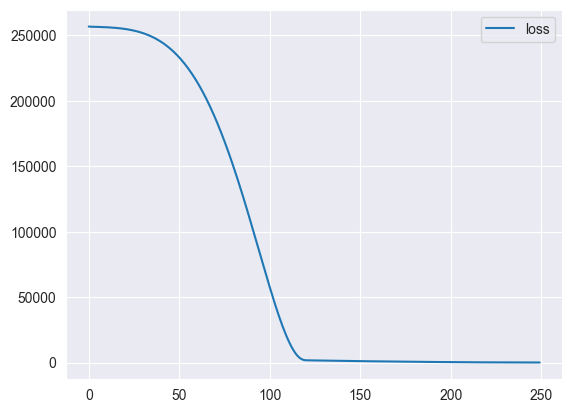

In [23]:
loss_df = pd.DataFrame(model.history.history) #Vraca history svih mse kroz epohe
loss_df.plot()  
loss_df.idxmin()    #Provera loss funkcije tj. kako je proslo treniranje kroz epohe

In [24]:
model.evaluate(x=X_test,y=y_test, verbose = 1) #Vraca MSE na test setu

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.9141  


31.775468826293945

In [27]:
test_predictions = model.predict(X_test,verbose=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [29]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [30]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])


In [31]:
pred_df = pd.concat([pred_df, test_predictions], axis=1)

In [33]:
pred_df.columns = ['Test True Y', 'Model predictions']

<Axes: xlabel='Test True Y', ylabel='Model predictions'>

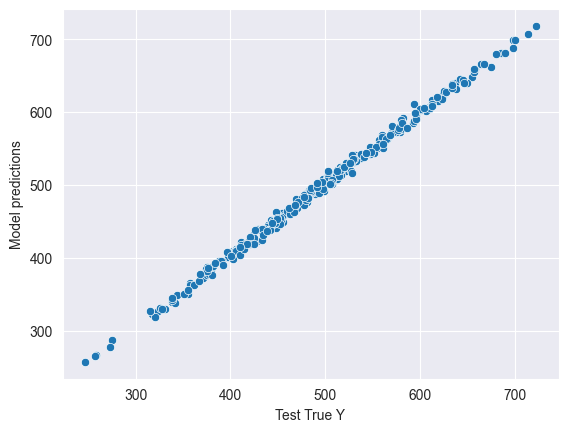

In [37]:
sns.scatterplot(pred_df, x='Test True Y', y='Model predictions')

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(pred_df['Test True Y'], pred_df['Model predictions'])

4.585646166526974

In [39]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [40]:
new_gem = [[998, 1000]]

In [41]:
#Prvo mora da se skaliraju ovi podaci od novog gem-a
scaler.transform(new_gem)


array([[0.14117652, 0.53968792]])

In [42]:
new_gem = scaler.transform(new_gem)

In [43]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[424.3]], dtype=float32)